In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result_ins
import mmcv

In [2]:
config_file = './configs/solov2/solov2_r50_fpn_8gpu_3x.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = './checkpoints/SOLOv2_R50_3x.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [ ]:
model.forward_test

In [5]:
# test a single image
img = './demo/demo1.PNG'
result = inference_detector(model, img)

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


> /mnt/SOLO-master/mmdet/models/detectors/single_stage_ins.py(85)simple_test()
-> if self.with_mask_feat_head:


(Pdb)  c


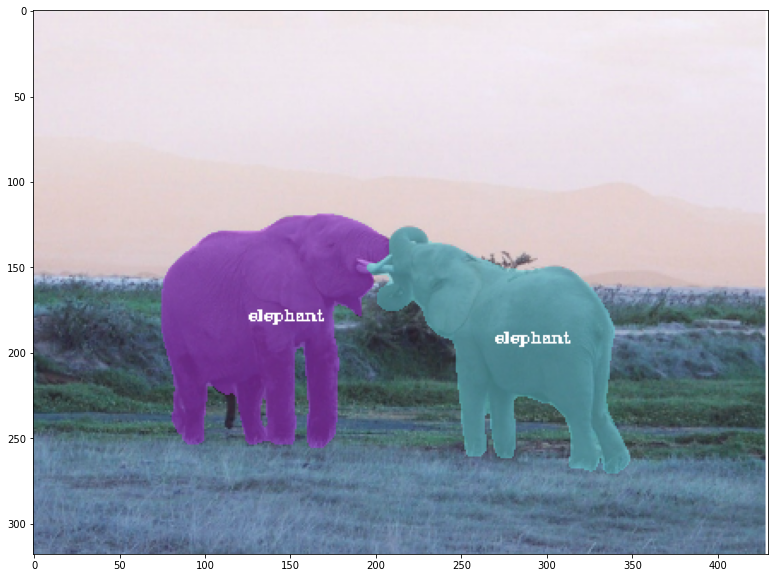

In [6]:
show_result_ins(img, result, model.CLASSES, score_thr=0.25, sort_by_density = False)

In [ ]:
# show the results
show_result_pyplot(img, result, model.CLASSES)

In [3]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result_ins
import mmcv


config_file = './configs/solo/decoupled_solo_r50_fpn_8gpu_3x.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = './checkpoints/DECOUPLED_SOLO_R50_3x.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image
img = './demo/demo.jpg'
result = inference_detector(model, img)

show_result_ins(img, result, model.CLASSES, score_thr=0.25)

ImportError: /mnt/SOLO-master/mmdet/ops/dcn/deform_conv_cuda.cpython-38-x86_64-linux-gnu.so: undefined symbol: _ZN6caffe28TypeMeta21_typeMetaDataInstanceISt7complexIdEEEPKNS_6detail12TypeMetaDataEv

In [2]:
import torch
import tensorwatch as tw

from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result_ins
import mmcv

config_file = './configs/solov2/solov2_r50_fpn_8gpu_3x.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = './checkpoints/SOLOv2_R50_3x.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')


ModuleNotFoundError: No module named 'tensorwatch'

In [ ]:
tw.draw_model(model.backbone, [1,3,1216,800])

In [5]:
import torch
model = torch.load('model.pth')

In [ ]:
alexnet_model

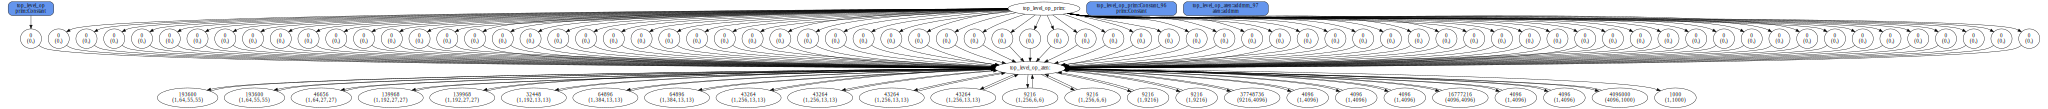

In [3]:
import tensorwatch as tw
import torchvision.models
alexnet_model = torchvision.models.alexnet()
tw.draw_model(alexnet_model, [1, 3, 224, 224])

In [3]:
import torch
import torchvision

dummy_input = torch.randn(10, 3, 224, 224, device="cuda")
model = torchvision.models.alexnet(pretrained=True).cuda()

# Providing input and output names sets the display names for values
# within the model's graph. Setting these does not change the semantics
# of the graph; it is only for readability.
#
# The inputs to the network consist of the flat list of inputs (i.e.
# the values you would pass to the forward() method) followed by the
# flat list of parameters. You can partially specify names, i.e. provide
# a list here shorter than the number of inputs to the model, and we will
# only set that subset of names, starting from the beginning.
input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]



In [ ]:
import torch
import torchvision
import numpy as np

input_names = [ "actual_input" ] 
output_names = [ "output1" ]
model = torch.load('model.pth')
dummy_input = torch.randn(1, 3, 1216, 800, device="cuda")
img_meta = {'filename': '/mnt/coco/images/train2017/000000435751.jpg', 'ori_shape': (369, 640, 3), 
              'img_shape': (704, 1221, 3), 'pad_shape': (704, 1248, 3), 'scale_factor': 1.9078590785907859, 
              'flip': True, 'img_norm_cfg': {'mean': np.array([123.675, 116.28 , 103.53 ]), 
                                             'std': np.array([58.395, 57.12 , 57.375]), 
                                             'to_rgb': True}}
dummy_input = (dummy_input, img_meta)
torch.onnx.export(model.module, dummy_input, "resnet.onnx", verbose=True, input_names=input_names, output_names=output_names)

In [4]:
import torch
import torchvision
import numpy as np
import mmcv

model = torch.load('model.pth')

dummy_input0 = torch.randn(1, 256, 304, 200, device="cuda")
dummy_input1 = torch.randn(1, 256, 152, 100, device="cuda")
dummy_input2 = torch.randn(1, 256, 76, 50, device="cuda")
dummy_input3 = torch.randn(1, 256, 38, 25, device="cuda")
dummy_input4 = torch.randn(1, 256, 19, 13, device="cuda")

dummy_input = [dummy_input0, dummy_input1, dummy_input2, dummy_input3, dummy_input4]

torch.onnx.export(model.module.bbox_head, dummy_input, "solov2_head.onnx", opset_version=11, verbose=True, input_names='input_names', output_names='output_names')

ImportError: /mnt/SOLO-master/mmdet/ops/dcn/deform_conv_cuda.cpython-38-x86_64-linux-gnu.so: undefined symbol: _ZN6caffe28TypeMeta21_typeMetaDataInstanceISt7complexIdEEEPKNS_6detail12TypeMetaDataEv

In [ ]:
dummy_input = list(torch.randn(1, 3, 1216, 800, device="cuda"))
img_meta = {'filename': '/mnt/coco/images/train2017/000000435751.jpg', 'ori_shape': (369, 640, 3), 
              'img_shape': (704, 1221, 3), 'pad_shape': (704, 1248, 3), 'scale_factor': 1.9078590785907859, 
              'flip': True, 'img_norm_cfg': {'mean': np.array([123.675, 116.28 , 103.53 ]), 
                                             'std': np.array([58.395, 57.12 , 57.375]), 
                                             'to_rgb': True}}
dummy_input = (dummy_input, 
               [[1]], 
               [[1]])
torch.onnx.export(model.module, dummy_input, "resnet.onnx", verbose=True, input_names=input_names, output_names=output_names)

In [37]:
model.module.bbox_head

SOLOv2Head(
  (loss_cate): FocalLoss()
  (cate_convs): ModuleList(
    (0): ConvModule(
      (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (gn): GroupNorm(32, 512, eps=1e-05, affine=True)
      (activate): ReLU(inplace=True)
    )
    (1): ConvModule(
      (conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (gn): GroupNorm(32, 512, eps=1e-05, affine=True)
      (activate): ReLU(inplace=True)
    )
    (2): ConvModule(
      (conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (gn): GroupNorm(32, 512, eps=1e-05, affine=True)
      (activate): ReLU(inplace=True)
    )
    (3): ConvModule(
      (conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (gn): GroupNorm(32, 512, eps=1e-05, affine=True)
      (activate): ReLU(inplace=True)
    )
  )
  (kernel_convs): ModuleList(
    (0): ConvModule(
      (conv): Conv2d(258, 